# Mission 1. Netflix and code

## Mandatory Part

- **한국 작품은 얼마나 있는가?**

In [12]:
import pandas as pd

netflix = pd.read_csv('netflix_titles.csv')
counts = (netflix['country']=='South Korea').sum()
print(f'한국작품은 {counts}개 있어요.')

한국작품은 183개 있어요.


## Bonus Part

- **가장 다작한 나라는?**

In [14]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [39]:
count_by_country = netflix[['show_id', 'country']].groupby('country').count()
x = count_by_country.sort_values('show_id').iloc[-1]
print(f"역시나 {x.name}이었습니다.")
print(f'{x[0]}개의 작품이 있네요.')

역시나 United States이었습니다.
2555개의 작품이 있네요.


# Mission 2. Let's GOOO!!

## Mandatory Part

- **정신차려!**

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
bit = pd.read_csv('BitCoin.csv')
bit['Date'] = bit['Date'].apply(lambda x: date(*list(map(int, x.split('-')))))
toshow = bit[bit['Date'] <= date(2017, 6, 30)][bit['Date'] >= date(2016,6,30)]
toshow = toshow.sort_values('Date')
ma5 = [np.sum(toshow['Open'].iloc[i:i+5]) for i in range(len(toshow)-4)]
days = [toshow['Date'].iloc[i] for i in range(len(toshow)-4)]

<ipython-input-96-c78e4e57ea59>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  toshow = bit[bit['Date'] <= date(2017, 6, 30)][bit['Date'] >= date(2016,6,30)]


Text(0, 0.5, 'Open price')

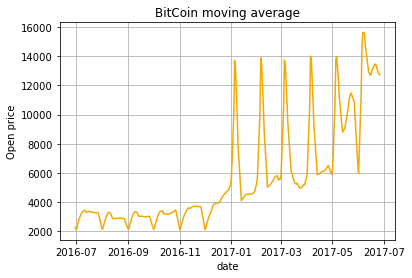

In [102]:
plt.plot(days, ma5, color='#f2a900')
plt.grid()
plt.title('BitCoin moving average')
plt.xlabel('date')
plt.ylabel('Open price')